In [1]:
# Import Libraries
import numpy as np



# ==================================================
# SECTION 1: NUMPY
# ==================================================

# 1. Create array from 1 to 20
arr = np.arange(1, 21)
print("Array from 1 to 20:")
print(arr)

# 2. Reshape into 4x5 matrix
matrix = arr.reshape(4, 5)
print("\n4x5 Matrix:")
print(matrix)

# 3. Mean, Median, Standard Deviation
print("\nMean:", np.mean(arr))
print("Median:", np.median(arr))
print("Standard Deviation:", np.std(arr))

# 4. Extract even numbers
even_numbers = arr[arr % 2 == 0]
print("\nEven Numbers:")
print(even_numbers)

# 5. Random 5x5 matrix and transpose
random_matrix = np.random.randint(1, 100, (5, 5))
print("\nRandom 5x5 Matrix:")
print(random_matrix)

print("\nTranspose of Random Matrix:")
print(random_matrix.T)

Array from 1 to 20:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

4x5 Matrix:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

Mean: 10.5
Median: 10.5
Standard Deviation: 5.766281297335398

Even Numbers:
[ 2  4  6  8 10 12 14 16 18 20]

Random 5x5 Matrix:
[[47 47 13 23 18]
 [75 23 24 77 65]
 [21  2 56 34 40]
 [66 51 63 17 59]
 [35 15 58 85 89]]

Transpose of Random Matrix:
[[47 75 21 66 35]
 [47 23  2 51 15]
 [13 24 56 63 58]
 [23 77 34 17 85]
 [18 65 40 59 89]]


In [9]:
 #SECTION 2: PANDAS
# ==================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==================================================
# SECTION 2: PANDAS
# ==================================================

# 1. Load CSV file
df = pd.read_csv("student_data.csv")
print("\nFull Dataset:")
print(df)

# 2. First & Last 5 records
print("\nFirst 5 Records:")
print(df.head())

print("\nLast 5 Records:")
print(df.tail())

# 3. Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Convert Subject rows into columns
pivot_df = df.pivot_table(index=["Student_ID","Name"], 
                          columns="Subject", 
                          values="Marks").reset_index()

print("\nPivot Table (Subjects as Columns):")
print(pivot_df)

# 5. Calculate average marks
pivot_df["Average"] = pivot_df[["Math","Science","English"]].mean(axis=1)

print("\nDataset with Average:")
print(pivot_df)

# 6. Student with highest average
topper = pivot_df.loc[pivot_df["Average"].idxmax()]
print("\nTopper:")
print(topper)

# 7. Students scored >75 in Math
math75 = pivot_df[pivot_df["Math"]>75]
print("\nStudents Scored >75 in Math:")
print(math75)

# 8. Result column
pivot_df["Result"] = np.where(pivot_df["Average"]>=40,"Pass","Fail")
print("\nFinal Dataset:")
print(pivot_df)

print(df)


Full Dataset:
    Student_ID    Name  Subject  Marks
0          101   Aarav     Math     78
1          102    Diya  Science     85
2          103   Rohan     Math     62
3          104   Sneha  English     90
4          105   Karan  Science     55
5          106   Pooja     Math     48
6          107   Rahul  English     72
7          108  Ananya  Science     88
8          109  Vikram     Math     35
9          110    Neha  English     67
10         111   Arjun  Science     91
11         112   Kavya     Math     76
12         113  Manish  English     40
13         114    Isha  Science     59
14         115  Suresh     Math     82

First 5 Records:
   Student_ID   Name  Subject  Marks
0         101  Aarav     Math     78
1         102   Diya  Science     85
2         103  Rohan     Math     62
3         104  Sneha  English     90
4         105  Karan  Science     55

Last 5 Records:
    Student_ID    Name  Subject  Marks
10         111   Arjun  Science     91
11         112   Kavya    

    Name    Average Result
0  Arjun  84.333333   Pass
1   Asha  87.666667   Pass
2  Meena  92.666667   Pass
3   Ravi  78.000000   Pass


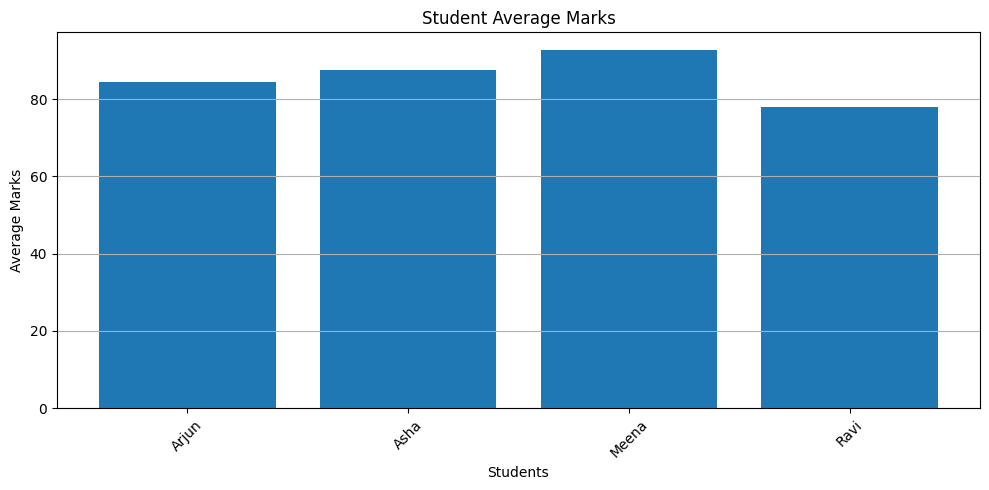

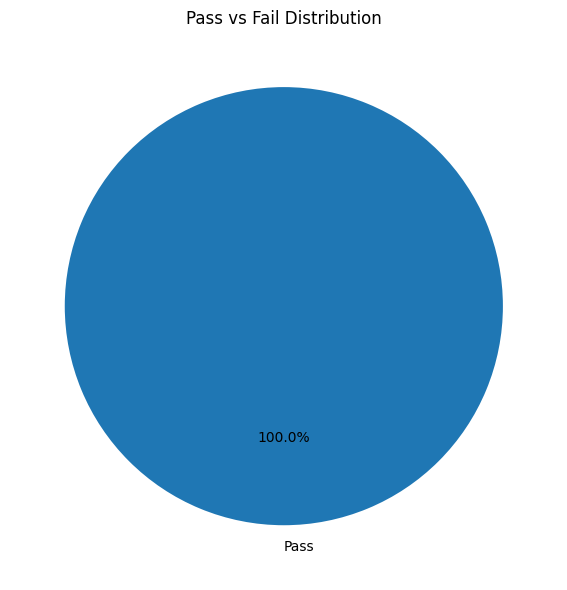

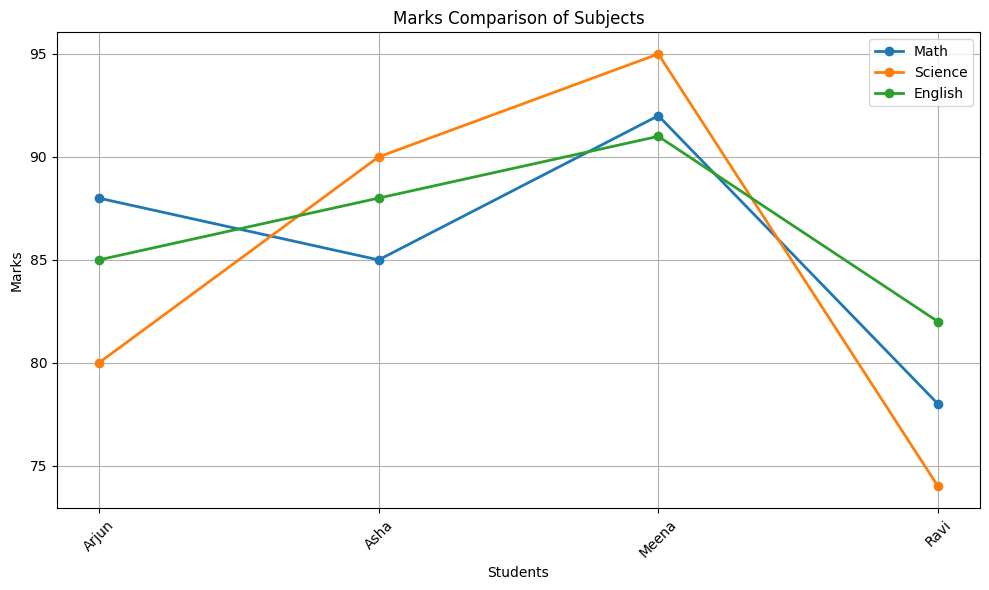

In [4]:
# SECTION 3: MATPLOTLIB
# ==================================================
import pandas as pd
import matplotlib.pyplot as plt

# Student subject-wise marks (long format)
data = {
    "Name": ["Asha","Asha","Asha",
             "Ravi","Ravi","Ravi",
             "Meena","Meena","Meena",
             "Arjun","Arjun","Arjun"],

    "Subject": ["Math","Science","English"]*4,

    "Marks": [85,90,88,
              78,74,82,
              92,95,91,
              88,80,85]
}

df = pd.DataFrame(data)

# Calculate average marks
avg_df = df.groupby("Name")["Marks"].mean().reset_index()
avg_df.rename(columns={"Marks":"Average"}, inplace=True)

# Pass/Fail (pass >= 40)
avg_df["Result"] = avg_df["Average"].apply(lambda x: "Pass" if x>=40 else "Fail")

pivot_df = avg_df

print(pivot_df)


plt.figure(figsize=(10,5))
plt.bar(pivot_df["Name"], pivot_df["Average"])

plt.title("Student Average Marks")
plt.xlabel("Students")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.tight_layout()
plt.show()

result_counts = pivot_df["Result"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(result_counts,
        labels=result_counts.index,
        autopct="%1.1f%%",
        startangle=90)

plt.title("Pass vs Fail Distribution")

plt.tight_layout()
plt.show()


line_df = df.pivot(index="Name", columns="Subject", values="Marks")
line_df = line_df.fillna(0)

plt.figure(figsize=(10,6))

plt.plot(line_df.index, line_df["Math"], marker='o', linewidth=2, label="Math")
plt.plot(line_df.index, line_df["Science"], marker='o', linewidth=2, label="Science")
plt.plot(line_df.index, line_df["English"], marker='o', linewidth=2, label="English")

plt.title("Marks Comparison of Subjects")
plt.xlabel("Students")
plt.ylabel("Marks")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()
